# imputation : fill missing values

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
pwd

'C:\\Users\\Asus\\Desktop\\spiced.python'

In [5]:
df = pd.read_csv("all_penguins_clean.csv", index_col=0)

In [19]:
df.head(3)

,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex
studyName,,,,,,,,,,,,,,
PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,A_0,MALE
PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,A_1,FEMALE
PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,A_2,FEMALE


In [7]:
df.shape

(344, 14)

In [8]:
df.isna

<bound method DataFrame.isna of            Sample Number Species  Region     Island               Stage  \
studyName                                                                 
PAL0708                1  Adelie  Anvers  Torgersen  Adult, 1 Egg Stage   
PAL0708                2  Adelie  Anvers  Torgersen  Adult, 1 Egg Stage   
PAL0708                3  Adelie  Anvers  Torgersen  Adult, 1 Egg Stage   
PAL0708                4  Adelie  Anvers  Torgersen  Adult, 1 Egg Stage   
PAL0708                5  Adelie  Anvers  Torgersen  Adult, 1 Egg Stage   
...                  ...     ...     ...        ...                 ...   
PAL0910              120  Gentoo  Anvers     Biscoe  Adult, 1 Egg Stage   
PAL0910              121  Gentoo  Anvers     Biscoe  Adult, 1 Egg Stage   
PAL0910              122  Gentoo  Anvers     Biscoe  Adult, 1 Egg Stage   
PAL0910              123  Gentoo  Anvers     Biscoe  Adult, 1 Egg Stage   
PAL0910              124  Gentoo  Anvers     Biscoe  Adult, 1 Egg St

In [9]:
df.isna().sum()

Sample Number           0
Species                 0
Region                  0
Island                  0
Stage                   0
Individual ID           0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Real ID                 0
Sex                    10
dtype: int64

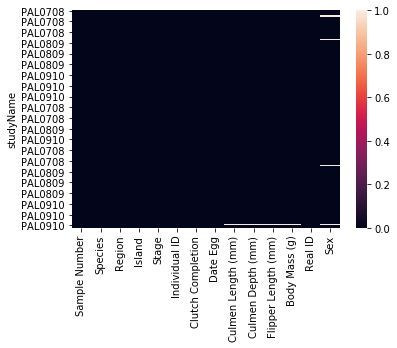

In [10]:
sns.heatmap(df.isna())

In [14]:
#fix categorical string value
df['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

In [16]:
df['Sex'].fillna('MISSING') #cretates new column

studyName
PAL0708       MALE
PAL0708     FEMALE
PAL0708     FEMALE
PAL0708    MISSING
PAL0708     FEMALE
            ...   
PAL0910    MISSING
PAL0910     FEMALE
PAL0910       MALE
PAL0910     FEMALE
PAL0910       MALE
Name: Sex, Length: 344, dtype: object

In [17]:
df['Sex'].fillna('MISSING', inplace = True)

In [24]:
med = df['Flipper Length (mm)'].median()
df['Flipper Length (mm)'].fillna(med,inplace= True)

### Other ideas :
 insert medians by category (seperate median for females/males)  df.groupby().transform()
 forward/ backward fill/interpolation (time series)
 K-Nearest Neighbors (finds the next most similar penguin)
    

# 2.Categories - One- Hot encoding

In [25]:
df ['Sex'] # male = 0, female = 1, missing = 2 (next row)

studyName
PAL0708       MALE
PAL0708     FEMALE
PAL0708     FEMALE
PAL0708    MISSING
PAL0708     FEMALE
            ...   
PAL0910    MISSING
PAL0910     FEMALE
PAL0910       MALE
PAL0910     FEMALE
PAL0910       MALE
Name: Sex, Length: 344, dtype: object

In [27]:
onehot = pd.get_dummies(df['Sex'])
onehot.head(3)


,.,FEMALE,MALE,MISSING
studyName,,,,
PAL0708,0,0,1,0
PAL0708,0,1,0,0
PAL0708,0,1,0,0


In [30]:
df2 = pd.concat([df, onehot], axis=0)
df2.head(3)
# pro tip = leave out 1 column, because it is redundant
del df2['.']

,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex,.,FEMALE,MALE,MISSING
studyName,,,,,,,,,,,,,,,,,,
PAL0708,1.0,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,A_0,MALE,NaN,NaN,NaN,NaN
PAL0708,2.0,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,A_1,FEMALE,NaN,NaN,NaN,NaN
PAL0708,3.0,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,A_2,FEMALE,NaN,NaN,NaN,NaN
PAL0708,4.0,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,197.0,NaN,A_3,MISSING,NaN,NaN,NaN,NaN
PAL0708,5.0,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,A_4,FEMALE,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PAL0910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
PAL0910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
PAL0910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0


### 3.Binning
scalar -> category

In [33]:
df['Body Mass (g)'].fillna(3000.0, inplace= True)


In [34]:
pd.qcut(df['Body Mass (g)'], q=3) #column, number of bins

studyName
PAL0708    (3700.0, 4533.333]
PAL0708    (3700.0, 4533.333]
PAL0708    (2699.999, 3700.0]
PAL0708    (2699.999, 3700.0]
PAL0708    (2699.999, 3700.0]
                  ...        
PAL0910    (2699.999, 3700.0]
PAL0910    (4533.333, 6300.0]
PAL0910    (4533.333, 6300.0]
PAL0910    (4533.333, 6300.0]
PAL0910    (4533.333, 6300.0]
Name: Body Mass (g), Length: 344, dtype: category
Categories (3, interval[float64]): [(2699.999, 3700.0] < (3700.0, 4533.333] < (4533.333, 6300.0]]

In [37]:
df['weight']=pd.qcut(df['Body Mass (g)'], q=3, labels=['light', 'medium', 'heavy'])
df['weight'].head(3)

studyName
PAL0708    medium
PAL0708    medium
PAL0708     light
Name: weight, dtype: category
Categories (3, object): [light < medium < heavy]

In [ ]:
# next step: one-hot encope -> 3 binary columns 

In [ ]:
alternatives
 pd.cut #bins of equal width
 set bin boundaires manually in pd.cur or pd.qcut


Species
Adelie       AxesSubplot(0.125,0.125;0.775x0.755)
Chinstrap    AxesSubplot(0.125,0.125;0.775x0.755)
Gentoo       AxesSubplot(0.125,0.125;0.775x0.755)
Name: Body Mass (g), dtype: object

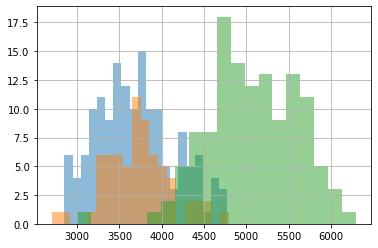

In [38]:
df.groupby('Species')['Body Mass (g)'].hist(bins= 20 , alpha= 0.5)

### 4.Normalization

Change the range and/or distrubiton of values
Examples :
* log-scale
* rescale to 0.0 .... 1.0
* rescale to a standart normal distrubition

# log normalization

 * useful when data streches over many orders of magnitude
 * when data is not normally distributed
 * usually done with countable things
 * does not work with  negative values



In [ ]:
df['log_mass']=np.log(df['Body Mass (g)'])
df['log_mass'].head(3)

# Min Max Scaling
 * lightest penguin - 0.0
 * heaviest penguin - 1.0   

In [46]:
# 1) calculate the range
mass_range = df['Body Mass (g)'].max() - df['Body Mass (g)'].min()
mass_range

3600.0

In [49]:
df['mass_scale'] = (df['Body Mass (g)'] - df['Body Mass (g)'].min()) / mass_range
df['mass_scale'].head(3)

studyName
PAL0708    0.291667
PAL0708    0.305556
PAL0708    0.152778
Name: mass_scale, dtype: float64

In [ ]:
# ! distribution does not change 
# --> LogReg computation is more efficient

In [ ]:
# feature engineering is more important than modeling